In [1]:
! pip install xgboost

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Crude_Oil_Prices_Daily_ 1986-2023.xlsx to Crude_Oil_Prices_Daily_ 1986-2023.xlsx


In [4]:
df = pd.read_excel('Crude_Oil_Prices_Daily_ 1986-2023.xlsx')
df

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9612 non-null   datetime64[ns]
 1   Closing Value  9605 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 150.3 KB


In [6]:
df.rename(columns={'Closing Value': 'Closing_value', },inplace=True)

In [7]:
df.dropna(inplace=True)

In [8]:
#df['Closing_value'] = df['Closing_value'].round().astype(int)
df

,Date,Closing_value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df

,Date,Closing_value,Year,Month,Day
0,1986-01-02,25.56,1986,1,2
1,1986-01-03,26.00,1986,1,3
2,1986-01-06,26.53,1986,1,6
3,1986-01-07,25.85,1986,1,7
4,1986-01-08,25.87,1986,1,8
...,...,...,...,...,...
9607,2023-10-03,89.23,2023,10,3
9608,2023-10-04,84.22,2023,10,4
9609,2023-10-05,82.31,2023,10,5
9610,2023-10-06,82.79,2023,10,6


In [10]:
new_order = ['Date', 'Year', 'Month', 'Day', 'Closing_value']
df = df[new_order]
df

,Date,Year,Month,Day,Closing_value
0,1986-01-02,1986,1,2,25.56
1,1986-01-03,1986,1,3,26.00
2,1986-01-06,1986,1,6,26.53
3,1986-01-07,1986,1,7,25.85
4,1986-01-08,1986,1,8,25.87
...,...,...,...,...,...
9607,2023-10-03,2023,10,3,89.23
9608,2023-10-04,2023,10,4,84.22
9609,2023-10-05,2023,10,5,82.31
9610,2023-10-06,2023,10,6,82.79


In [11]:
x = df.drop(['Date', 'Closing_value'], axis=1)
y = df['Closing_value']

In [12]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=30, random_state=5)

In [13]:
from xgboost import XGBRegressor


model= XGBRegressor(n_estimators= 120, max_depth = 3)
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
ypred = model.predict(xtest)
ypred

array([ 32.511635,  46.772263,  32.68473 ,  18.650936,  19.747662,
        21.234665,  26.580656,  47.035233,  21.621445, 103.88026 ,
        63.107796,  34.209076,  30.463896,  45.121986,  91.03342 ,
        68.92443 ,  26.971973,  22.233488,  79.63189 ,  40.763428,
        58.172752,  54.394905,  60.818485, 102.43118 ,  94.80562 ,
        27.615133,  12.721488,  67.95536 ,  18.261269,  20.510838],
      dtype=float32)

In [15]:
#Accuracy

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.067615913081778


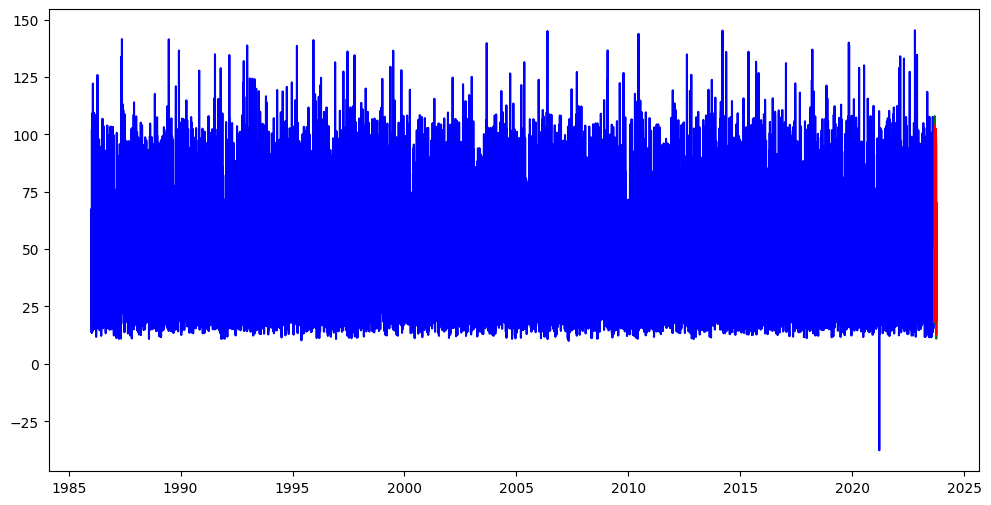

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

time_index = df['Date']
plt.figure(figsize=(12, 6))
plt.plot(time_index[:len(ytrain)], ytrain, label='Training Data', color='blue')
plt.plot(time_index[len(ytrain):], ytest, label='Testing Data', color='green')
plt.plot(time_index[len(ytrain):], ypred, label='Predictions', color='red')


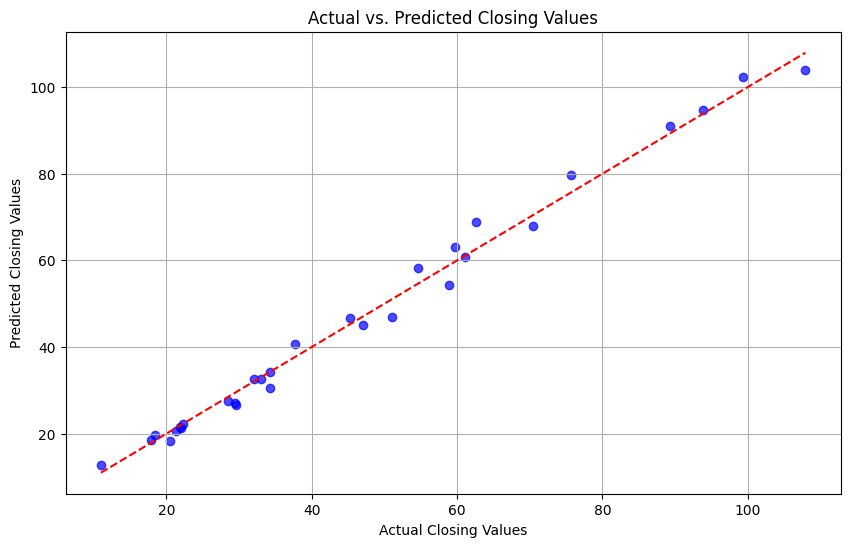

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='blue', alpha=0.7)
plt.title("Actual vs. Predicted Closing Values")
plt.xlabel("Actual Closing Values")
plt.ylabel("Predicted Closing Values")
plt.grid(True)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')

In [18]:
# Find the last date in your dataset
last_date = df['Date'].max()

# Add 1 year to the last date to find the end date for forecasting
end_date = last_date + pd.DateOffset(years=1)

# Generate a range of dates for the next 1 year
forecast_dates = pd.date_range(start=last_date, end=end_date, closed='right')

# Create a DataFrame with the forecast dates
forecast_df = pd.DataFrame({'Date': forecast_dates})

df1 = forecast_df
df1

<ipython-input-18-2da07c91855e>:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=last_date, end=end_date, closed='right')


,Date
0,2023-10-10
1,2023-10-11
2,2023-10-12
3,2023-10-13
4,2023-10-14
...,...
361,2024-10-05
362,2024-10-06
363,2024-10-07
364,2024-10-08


In [19]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1.loc[df1['Date'].isin(forecast_dates), 'Closing_value'] = None

In [20]:
df1

,Date,Year,Month,Day,Closing_value
0,2023-10-10,2023,10,10,NaN
1,2023-10-11,2023,10,11,NaN
2,2023-10-12,2023,10,12,NaN
3,2023-10-13,2023,10,13,NaN
4,2023-10-14,2023,10,14,NaN
...,...,...,...,...,...
361,2024-10-05,2024,10,5,NaN
362,2024-10-06,2024,10,6,NaN
363,2024-10-07,2024,10,7,NaN
364,2024-10-08,2024,10,8,NaN


In [21]:
# Concatenate the original DataFrame and the forecast DataFrame
df2 = pd.concat([df, df1], ignore_index=True)
df2

,Date,Year,Month,Day,Closing_value
0,1986-01-02,1986,1,2,25.56
1,1986-01-03,1986,1,3,26.00
2,1986-01-06,1986,1,6,26.53
3,1986-01-07,1986,1,7,25.85
4,1986-01-08,1986,1,8,25.87
...,...,...,...,...,...
9966,2024-10-05,2024,10,5,NaN
9967,2024-10-06,2024,10,6,NaN
9968,2024-10-07,2024,10,7,NaN
9969,2024-10-08,2024,10,8,NaN


In [22]:
X = df2.drop(['Date', 'Closing_value'], axis=1)
Y = df2['Closing_value']

In [23]:
Ypred = model.predict(X)
Ypred = pd.DataFrame(Ypred)
Ypred.columns = ['Forecasted_value']
Ypred

,Forecasted_value
0,23.022251
1,23.022251
2,22.562954
3,22.562954
4,22.562954
...,...
9966,86.331337
9967,86.331337
9968,86.331337
9969,87.113907


In [24]:
result = pd.concat([df2, Ypred], axis=1)
result

,Date,Year,Month,Day,Closing_value,Forecasted_value
0,1986-01-02,1986,1,2,25.56,23.022251
1,1986-01-03,1986,1,3,26.00,23.022251
2,1986-01-06,1986,1,6,26.53,22.562954
3,1986-01-07,1986,1,7,25.85,22.562954
4,1986-01-08,1986,1,8,25.87,22.562954
...,...,...,...,...,...,...
9966,2024-10-05,2024,10,5,NaN,86.331337
9967,2024-10-06,2024,10,6,NaN,86.331337
9968,2024-10-07,2024,10,7,NaN,86.331337
9969,2024-10-08,2024,10,8,NaN,87.113907


In [25]:
result['Difference'] = result['Closing_value'] - result['Forecasted_value']
result['Difference'].fillna(value=pd.NA, inplace=True)
result

,Date,Year,Month,Day,Closing_value,Forecasted_value,Difference
0,1986-01-02,1986,1,2,25.56,23.022251,2.537749
1,1986-01-03,1986,1,3,26.00,23.022251,2.977749
2,1986-01-06,1986,1,6,26.53,22.562954,3.967046
3,1986-01-07,1986,1,7,25.85,22.562954,3.287046
4,1986-01-08,1986,1,8,25.87,22.562954,3.307046
...,...,...,...,...,...,...,...
9966,2024-10-05,2024,10,5,NaN,86.331337,NaN
9967,2024-10-06,2024,10,6,NaN,86.331337,NaN
9968,2024-10-07,2024,10,7,NaN,86.331337,NaN
9969,2024-10-08,2024,10,8,NaN,87.113907,NaN


<Axes: >

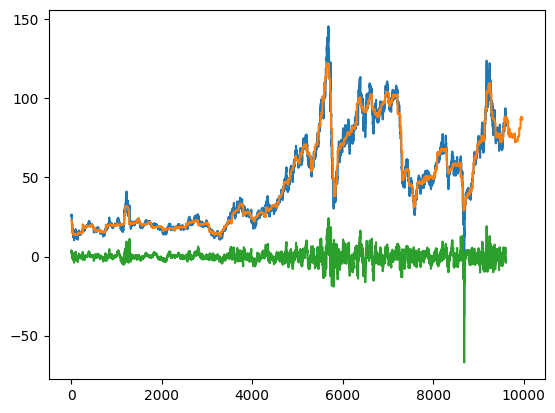

In [26]:
result['Closing_value'].plot()
result['Forecasted_value'].plot()
result['Difference'].plot()

In [27]:
result.to_csv('forecasted_result.csv', index=False)

import pandas as pd
import numpy as np
import streamlit as st

result = pd.read_csv('/content/forecasted_result.csv')

# Convert the 'Date' column to a datetime object in the same format as selected_date
result['Date'] = pd.to_datetime(result['Date']).dt.strftime("%Y-%m-%d")

# Streamlit web application
st.title("Oil Price Forecasting App")

# Define the minimum and maximum date values
min_date = pd.to_datetime("2023-10-13")
max_date = pd.to_datetime("2024-10-09")

# Get the user's input date
forecast_date = st.date_input("Enter Date to forecast:", min_value=min_date, max_value=max_date, value=min_date)

# Format the selected date as a string
selected_date = forecast_date.strftime("%Y-%m-%d")

# Check if the selected date exists in the index
if selected_date in result['Date'].values:
    forecasted_price = result.loc[result['Date'] == selected_date, "Forecasted_value"].values[0]
    # Display the forecasted price
    st.write(f"Forecasted Price on {selected_date} is {forecasted_price:.2f}")
else:
    st.write(f"No forecast data available for {selected_date}")

import matplotlib.pyplot as plt
st.write("Line Plot of Closing and Forecasted Values:")
plt.figure(figsize=(10, 6))
result['Closing_value'].plot()
result['Forecasted_value'].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Closing Value vs Forecasted Value')
plt.legend()
st.pyplot(plt)


